In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from obspy.core.event import read_events
import obspy
import eqcorrscan
import eqcorrscan.core.match_filter.template as template
from obspy.clients.fdsn.client import Client
from eqcorrscan.core.template_gen import template_gen
from eqcorrscan import Tribe
from datetime import datetime
client = Client('IRIS')

In [80]:
path = 'detections_sep2017/'
t1 = datetime(2017,9,1)
t2 = datetime(2017,11,1)

In [81]:
def read_detections(path,t1,t2):
    
    time_bins = pd.to_datetime(np.arange(t1,t2,pd.Timedelta(1,'days')))
    
    parties = []
    for t in time_bins:
        pfile = path + 'party_' + t.strftime('%m_%d_%Y') + '.tgz'
        party = eqcorrscan.core.match_filter.party.Party().read(pfile)
        if len(party.families) > 0:
            parties.append(party)
        else:
            print('Detection did not work on ' + t.strftime('%m_%d_%Y'))

    # Combine the results from separate days into one party
    families = []
    num_templates = len(parties[0].families)
    for i in range(num_templates):
        fam_list = [p[i] for p in parties]
        fam = fam_list[0]
        for f in fam_list[1:]:
            fam = fam.append(f)
        families.append(fam)
    party = eqcorrscan.core.match_filter.party.Party(families=families)
    
    return party

In [82]:
party = read_detections(path,t1,t2)

Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks


Detection did not work on 09_04_2017


Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origi

Detection did not work on 09_11_2017


Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origi

Detection did not work on 10_14_2017
Detection did not work on 10_15_2017


Could not compute relative origin: no picks


Detection did not work on 10_19_2017


Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks
Could not compute relative origin: no picks


Detection did not work on 10_28_2017


Could not compute relative origin: no picks


In [84]:
for f in party:
    print(f)

Family of 2 detections from template growclust5_ev520234
Family of 8 detections from template growclust6_ev520343
Family of 1 detections from template growclust8_ev519836
Family of 1 detections from template growclust3_ev520909
Family of 7 detections from template growclust1_ev519970
Family of 0 detections from template growclust2_ev520643
Family of 0 detections from template growclust7_ev520826
Family of 16 detections from template growclust17_ev519551
Family of 32 detections from template growclust4_ev519904
Family of 44 detections from template growclust10_ev519520
Family of 6 detections from template growclust24_ev520672
Family of 35 detections from template growclust16_ev520891


### Look at how the cross correlation values of each detected event distributes throughout time:

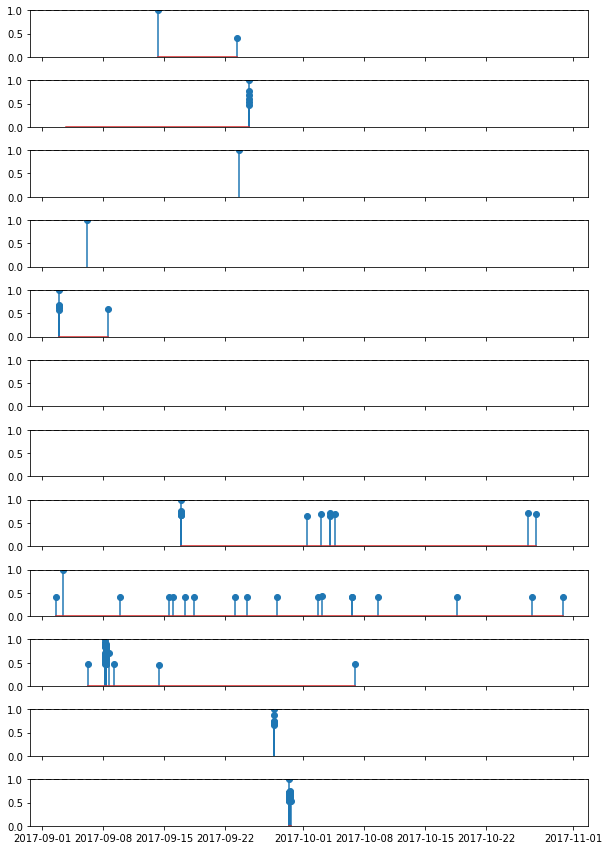

In [23]:
fig = plt.figure(figsize=(10,15))
axs = fig.subplots(len(party.families), 1, gridspec_kw={'hspace': 0.5},sharey=True,sharex=True)

for i,family in enumerate(party):
    times = [detection.detect_time.datetime for detection in family.detections]
    vals = [detection.detect_val for detection in family.detections]
    thresh = [detection.threshold for detection in family.detections]
    chans = [detection.no_chans for detection in family.detections]
    av_chan_corrs = []
    for j,val in enumerate(vals):
        av_chan_corrs.append((vals[j]/chans[j]))
    
    if len(times) > 0:
        axs[i].stem(times,av_chan_corrs)
    axs[i].axhline(1,color='k',linestyle='--')
    axs[i].set_ylim(0,1)
    # axs[i].set_xlim(datetime(2017,9,8),datetime(2017,9,9))
    # axs[i].set_xlim(datetime(2017,9,24),datetime(2017,9,25))

### Let's look specifically at one template which found a temporally tight cluster:

(-1.0, 1.0)

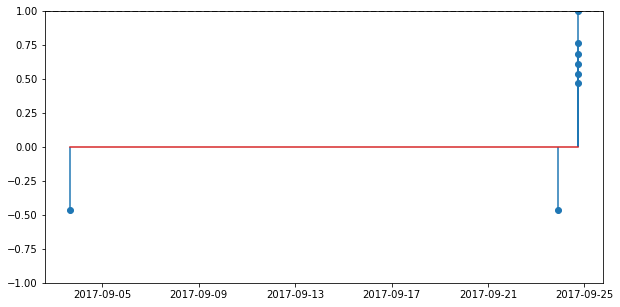

In [27]:
fig = plt.figure(figsize=(10,5))
axs = fig.subplots(1, 1, gridspec_kw={'hspace': 0},sharey=True,sharex=True)

family = party[1]
times = [detection.detect_time.datetime for detection in family.detections]
vals = [detection.detect_val for detection in family.detections]
thresh = [detection.threshold for detection in family.detections]
chans = [detection.no_chans for detection in family.detections]
av_chan_corrs = []
for j,val in enumerate(vals):
    av_chan_corrs.append((vals[j]/chans[j]))

if len(times) > 0:
    axs.stem(times,av_chan_corrs)
axs.axhline(1,color='k',linestyle='--')
axs.set_ylim(-1,1)

(17433.708333333332, 17433.729166666668)

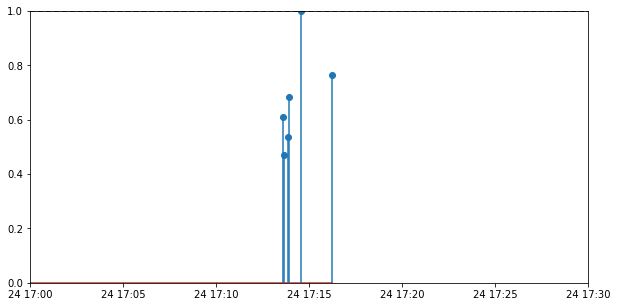

In [30]:
fig = plt.figure(figsize=(10,5))
axs = fig.subplots(1, 1, gridspec_kw={'hspace': 0},sharey=True,sharex=True)

family = party[1]
times = [detection.detect_time.datetime for detection in family.detections]
vals = [detection.detect_val for detection in family.detections]
thresh = [detection.threshold for detection in family.detections]
chans = [detection.no_chans for detection in family.detections]
av_chan_corrs = []
for j,val in enumerate(vals):
    av_chan_corrs.append((vals[j]/chans[j]))

if len(times) > 0:
    axs.stem(times,av_chan_corrs)
axs.axhline(1,color='k',linestyle='--')
axs.set_ylim(0,1)
axs.set_xlim(datetime(2017,9,24,17),datetime(2017,9,24,17,30))

### Here's an example of all the detections found by that template and how they visually compare to their average cross correlation value:

Average cc = -0.461800677436


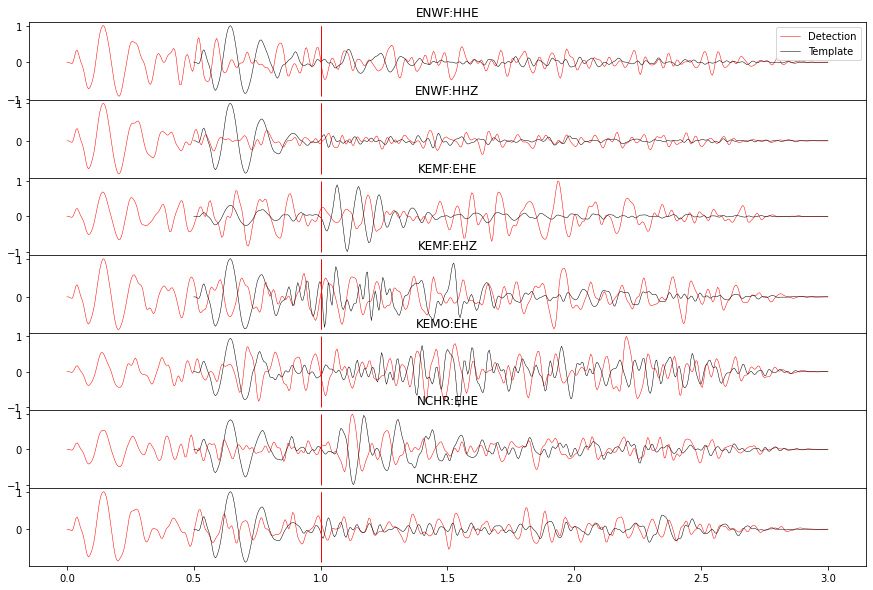

Average cc = -0.466626848493


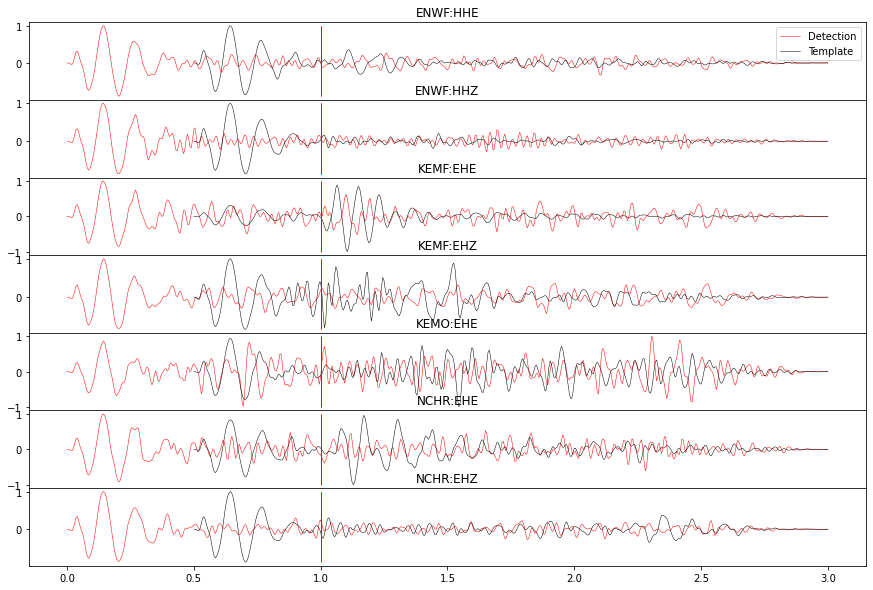

Average cc = 0.608966009957


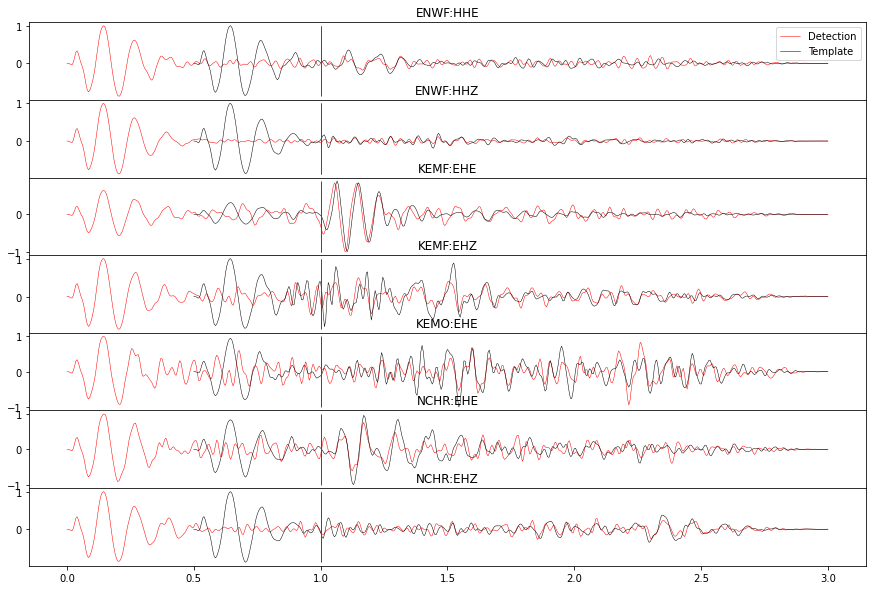

Average cc = 0.471295901707


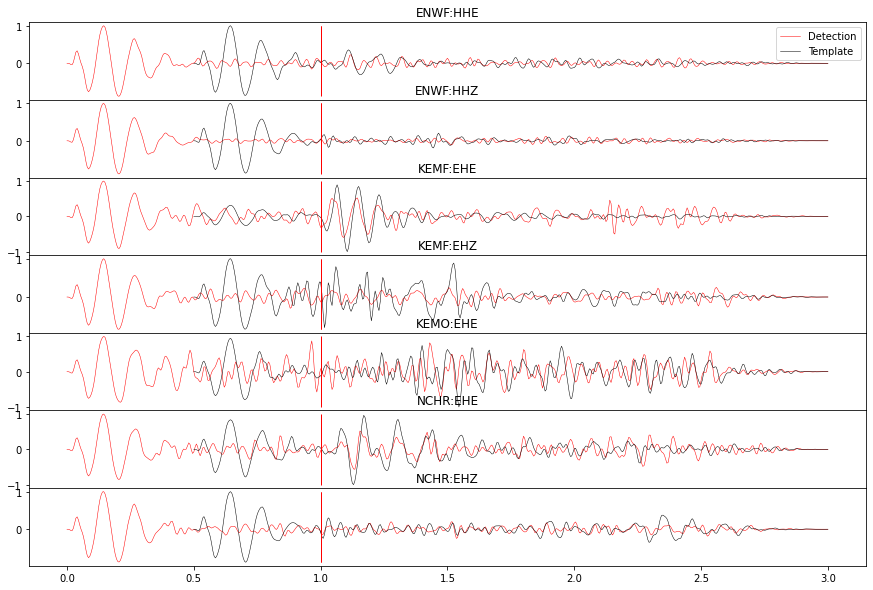

Average cc = 0.534983158112


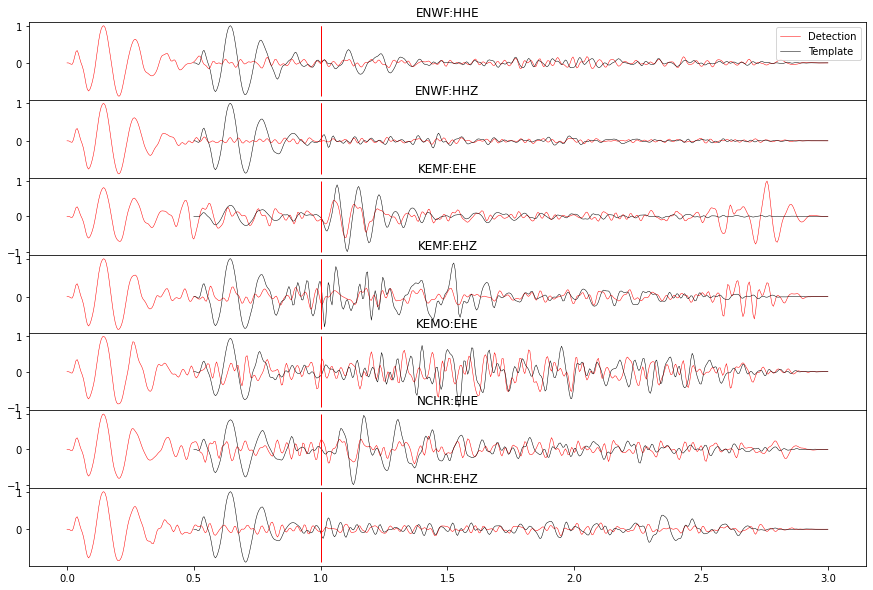

Average cc = 0.685424532209


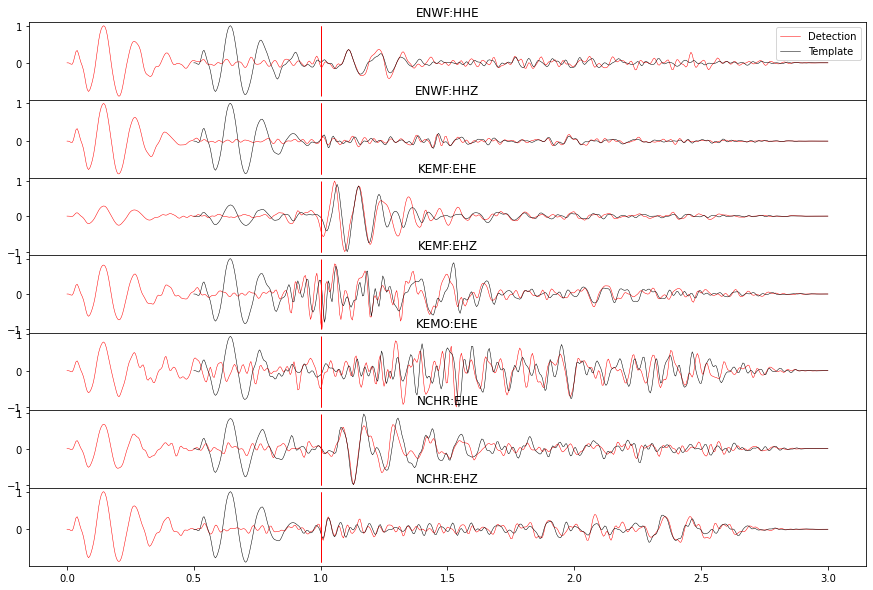

Average cc = 0.998390947069


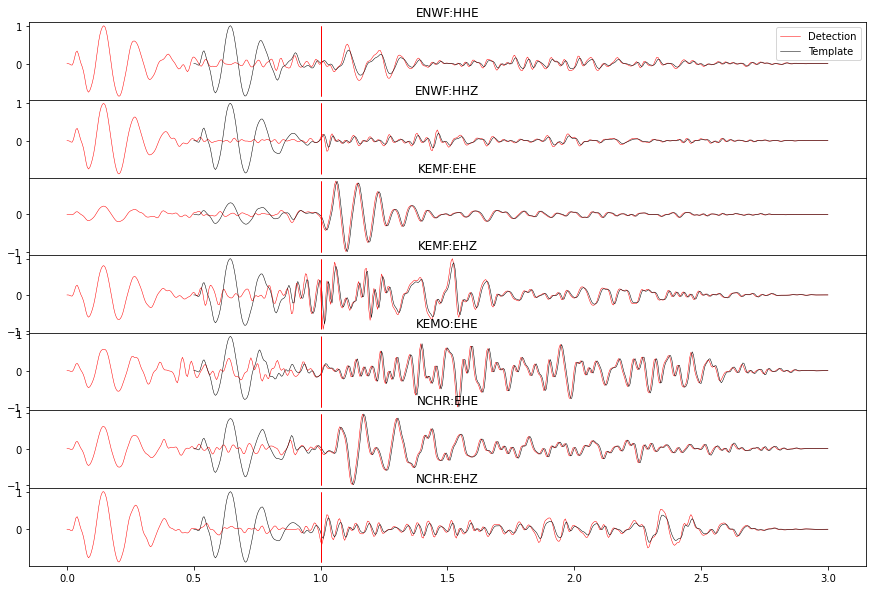

Average cc = 0.76630115509


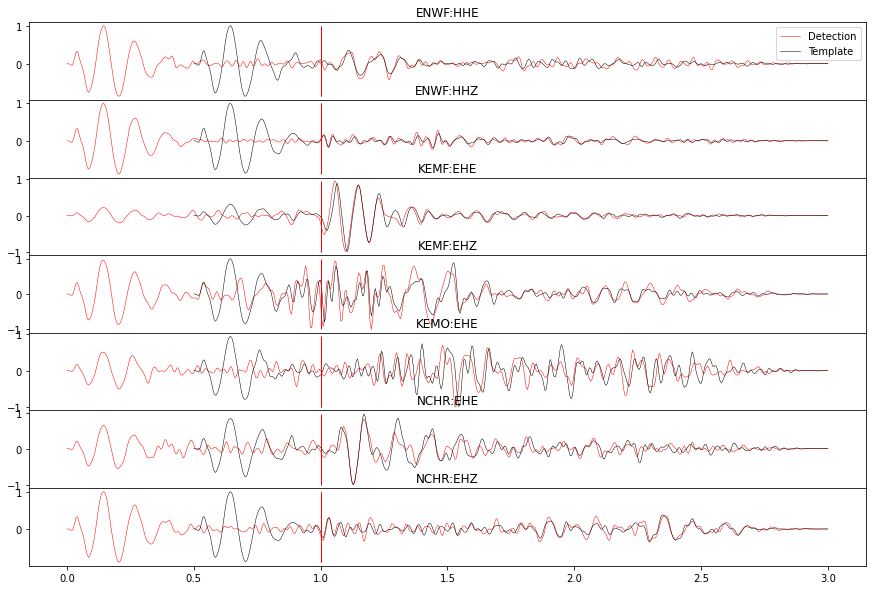

In [13]:
temp = party[1].template.event
for det in party[1].detections:
    av_chan_corr = (det.detect_val/det.no_chans)
    print('Average cc = ' + str(av_chan_corr))
    fig = plt.figure(figsize=(15, 10))
    axs = fig.subplots(len(det.event.picks), 1, gridspec_kw={'hspace': 0})
    for i,pick in enumerate(det.event.picks):

        # New Detection
        t1 = pick.time-1
        t2 = pick.time+2
        sta_code = pick.waveform_id.station_code
        loc_code = pick.waveform_id.location_code
        chan_code = pick.waveform_id.channel_code
        st = client.get_waveforms("NV",sta_code,loc_code,chan_code,t1,t2)
        st.filter('bandpass',freqmin=8,freqmax=35)
        st = st.taper(max_percentage=0.2)
        st.normalize()
        l1, = axs[i].plot(st[0].times(),st[0].data,'r',linewidth=0.5,label='Detection') 
        axs[i].set_title(pick.waveform_id.station_code+':'+pick.waveform_id.channel_code)
        axs[i].vlines(x=1,ymin=min(st[0].data),ymax=max(st[0].data),colors ='r',linewidth=1)

        # Template waveform
        temp_stamatches = [temp_pick for temp_pick in temp.picks if temp_pick.waveform_id.station_code==sta_code]
        temp_pick = [temp_pick for temp_pick in temp_stamatches if temp_pick.waveform_id.channel_code==chan_code][0]
        t1 = temp_pick.time-0.5
        t2 = temp_pick.time+2
        st_temp = client.get_waveforms("NV",sta_code,loc_code,chan_code,t1,t2)
        st_temp.filter('bandpass',freqmin=8,freqmax=35)
        st_temp = st_temp.taper(max_percentage=0.2)
        st_temp.normalize()
        l2, = axs[i].plot(st_temp[0].times()+.5,st_temp[0].data,'k',linewidth = 0.5,label='Template') 
        axs[i].set_title(pick.waveform_id.station_code+':'+pick.waveform_id.channel_code)
        axs[i].vlines(x=1,ymin=min(st_temp[0].data),ymax=max(st_temp[0].data),colors ='r',linewidth=1)

        if i==0:
            axs[i].legend(handles=[l1, l2])
            
    plt.show()


#### A cross correlation cut-off of 0.7 seems appropriate. Filter the detections based on average channel cross correlation

In [85]:
# Remove detections with average cross correlation < threshold

cc_thresh = 0.7

filtered_families = []
for family in party:
    keep = []
    for det in family:
        av_chan_corr = (det.detect_val/det.no_chans)
        if av_chan_corr > cc_thresh:
            keep.append(det)
    fam = eqcorrscan.core.match_filter.family.Family(family.template,detections=keep)
    filtered_families.append(fam)
    
party = eqcorrscan.core.match_filter.party.Party(families=filtered_families)

### That leaves us with considerably fewer detections:

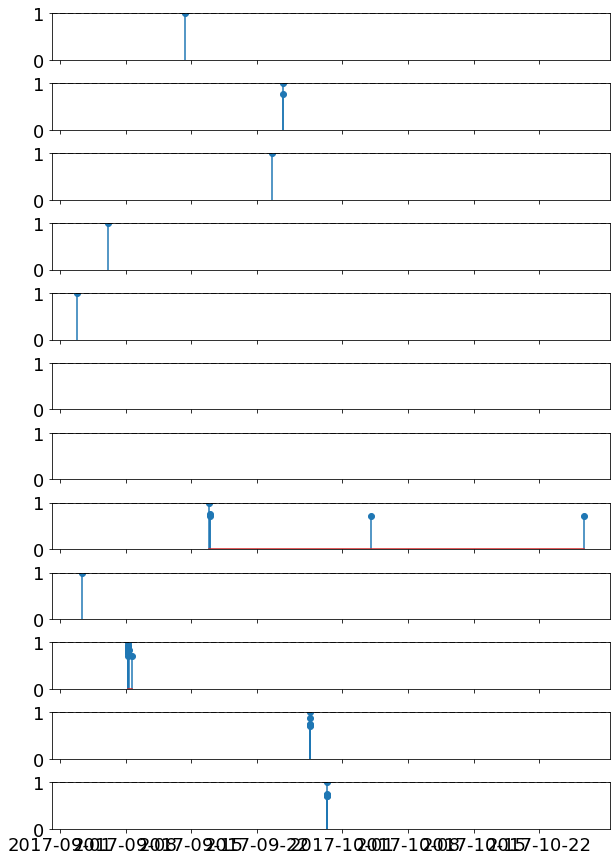

In [86]:
fig = plt.figure(figsize=(10,15))
axs = fig.subplots(len(party.families), 1, gridspec_kw={'hspace': 0.5},sharey=True,sharex=True)

for i,family in enumerate(party):
    times = [detection.detect_time.datetime for detection in family.detections]
    vals = [detection.detect_val for detection in family.detections]
    thresh = [detection.threshold for detection in family.detections]
    chans = [detection.no_chans for detection in family.detections]
    av_chan_corrs = []
    for j,val in enumerate(vals):
        av_chan_corrs.append((vals[j]/chans[j]))
    
    if len(times) > 0:
        axs[i].stem(times,av_chan_corrs)
    axs[i].axhline(1,color='k',linestyle='--')
    axs[i].set_ylim(0,1)

### I haven't located the detections yet, but where are the templates located?

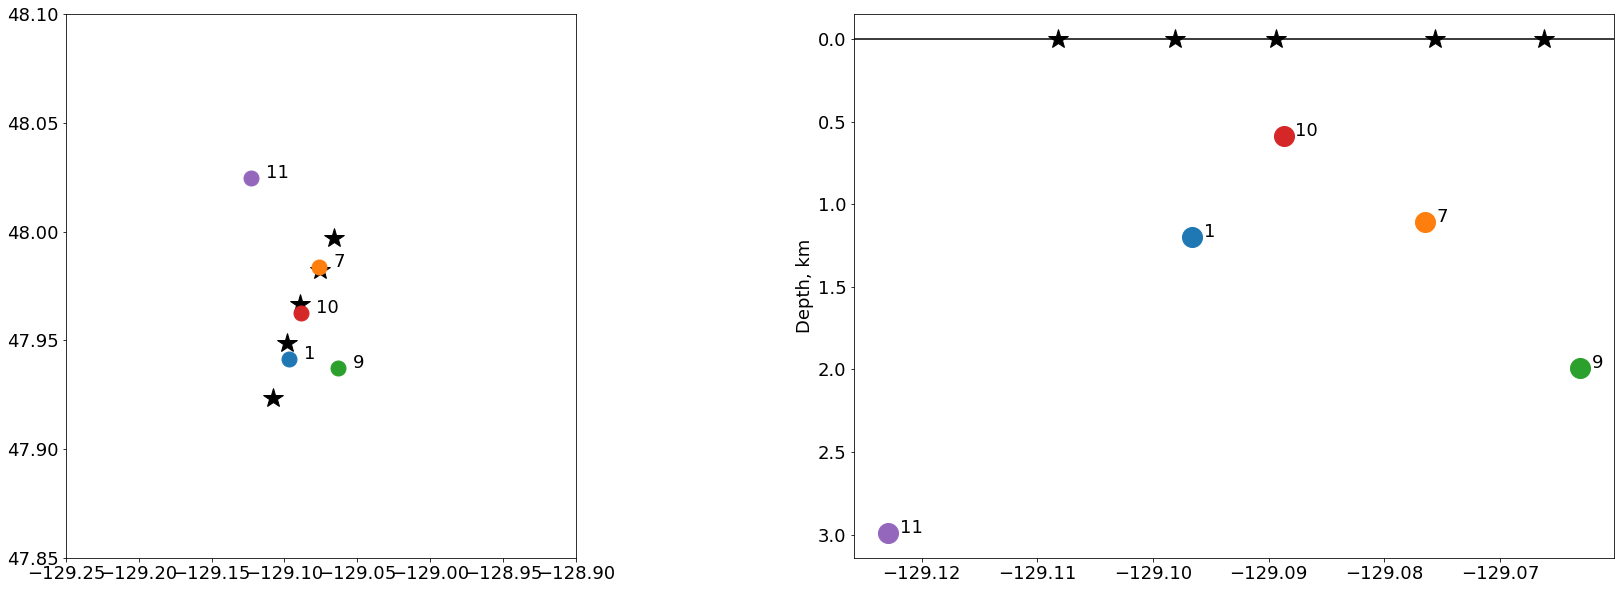

In [78]:
vent_lon=[-129.098100000000,-129.089400000000,-129.075600000000,-129.108200000000,-129.066200000000]
vent_lat=[47.9487000000000,47.9666000000000,47.9822000000000,47.9233000000000,47.9969000000000] 

#lats = [f.template.event.origins[0].latitude for f in party]
#lons = [f.template.event.origins[0].longitude for f in party]
#depths = [f.template.event.origins[0].depth for f in party]
lats = []
lons = []
depths = []
clust_num = []
for i,f in enumerate(party):
    if len(f)>1:
        lats.append(f.template.event.origins[0].latitude)
        lons.append(f.template.event.origins[0].longitude)
        depths.append(f.template.event.origins[0].depth)
        clust_num.append(i)


num = range(len(lats))

plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(1, 2,figsize=[30,10])

ax[0].plot(vent_lon,vent_lat,'k*',markersize=20,linestyle="none")
ax[0].set_xlim([-129.25,-128.9])
ax[0].set_ylim([47.85,48.1])
ax[0].set_aspect(1/0.67);

ax[1].plot(vent_lon,np.zeros(len(vent_lon)),'k*',markersize=20,linestyle="none")
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.ylabel('Depth, km');

for i,lat in enumerate(lats):
    ax[0].plot(lons[i],lats[i],'o',markersize=15)
    ax[0].text(lons[i]+.01,lats[i],str(clust_num[i]))
    ax[1].plot(lons[i],depths[i],'o',markersize=20)
    ax[1].text(lons[i]+0.001,depths[i],str(clust_num[i]))

plt.show()

## Biggest family - template 9

In [43]:
t1 = datetime(2017,9,8,4)
t2 = datetime(2017,9,8,9)
big_family = [d for d in party[9] if ((d.detect_time.datetime > t1) & (d.detect_time.datetime < t2))]

In [44]:
times = [d.detect_time for d in big_family]
interevent = np.diff(times)
print(np.mean(interevent)/60)
print(np.median(interevent)/60)

12.7506736111
4.30495833333


In [45]:
times

[2017-09-08T05:48:21.260000Z,
 2017-09-08T05:59:26.900000Z,
 2017-09-08T05:59:32.290000Z,
 2017-09-08T06:01:46.990000Z,
 2017-09-08T06:02:22.840000Z,
 2017-09-08T06:02:41.940000Z,
 2017-09-08T06:04:09.610000Z,
 2017-09-08T06:04:52.850000Z,
 2017-09-08T06:11:14.745000Z,
 2017-09-08T06:25:51.925000Z,
 2017-09-08T07:07:58.320000Z,
 2017-09-08T07:16:11.125000Z,
 2017-09-08T08:21:21.745000Z]

## Smallest family - template 1

In [40]:
party[1]
times = [d.detect_time for d in party[1]]
interevent = np.diff(times)
print(np.mean(interevent)/60)
print(np.median(interevent)/60)

1.66741666667
1.66741666667


In [41]:
times

[2017-09-24T17:14:34.845000Z, 2017-09-24T17:16:14.890000Z]

## Method to remove duplicates- which likely won't be an issue anymore with the new detection threshold parameters

In [ ]:
# Take the first family as all correct
# Then, one by one, go through the rest of the families and compare them to the first family
f1_times = [detection.detect_time for detection in party[0].detections]
for i,detection in enumerate(party[1].detections):
    time_diff = [f1_time - detection.detect_time for f1_time in f1_times]
    if np.abs(time_diff).min() < 5:
        print('Different by ' + str(np.abs(time_diff).min()) + ' seconds')
        print(i)
        print(np.abs(time_diff).argmin())

#### Download streams for families so we can repick detections

In [ ]:
fam = party[1]

stream = obspy.core.stream.Stream()
for event in fam.catalog:

    print(event)
    t1 = min([p.time for p in event.picks])-5
    t2 = max([p.time for p in event.picks])+5
    
    sta = ",".join(np.unique([p.waveform_id.station_code for p in event.picks]))
    chan = ",".join(np.unique([p.waveform_id.channel_code for p in event.picks]))
    
    st = client.get_waveforms('NV',sta,'',chan,t1,t2)
    
    stream.extend(st)
    

#### Doing it as below seems to do poorly- I think because it doesn't preprocess/filter the stream?

In [ ]:
out_cat = eqcorrscan.core.lag_calc.xcorr_pick_family(fam, stream, shift_len=0.5, min_cc=0.5 )

#### Try this way instead:

In [ ]:
test = fam.lag_calc(stream,pre_processed=False,min_cc = 0.7)